<a href="https://colab.research.google.com/github/AnmolArora15/Loan-Prediction---ML-Problem/blob/main/Loan_Prediction_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Inroduction**


<img src = 'https://raw.github.com/AnmolArora15/Loan-Prediction---ML-Problem/main/Images/loan.jpeg' width ='1200' height = '300'>

- Our Client for this Project is Dream Housing Finance.
- The company deals in all kinds of home loans.
- They have a presence across all urban, semi-urban and rural areas.
- Customer first applies for home loan and after that company validates
  the customer eligibility for loan.
- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.
- To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

# **2.Problem Statement**

<img src = 'https://raw.github.com/AnmolArora15/Loan-Prediction---ML-Problem/main/Images/OIP.jpeg' width = '500' height = '200'>

- The current process is a Manual Process.
- Time taking process.
- We have to make a Classification Model to solve our Problem

<img src = 'https://raw.github.com/AnmolArora15/Loan-Prediction---ML-Problem/main/Images/loan2.jpeg' width = '500' height = '200'>

<a name = Section1></a>
# **3.Importing and Installing the libraries**



In [176]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression                 # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

<a name = Section4></a>
# **4. Data Acquisition & Description**

In [173]:
#Lets load the train dataset

In [179]:
train = pd.read_csv('/content/train1.csv')


In [177]:
train.shape

(614, 12)

In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [177]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [178]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [179]:
train.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

**Observations**
- Our dataset has 614 rows and 13 columns.
- 'Loan Status' is our **target feature.**
- Our Dataset has missing values.
- Dataset is somewhat skewed.

<a name = Section5></a>
# **5.Data Pre-processing**

1.   Impute Missing values
2.   Handle incosistencies(3+ to 3)
3.   dtype inconsistencies (int as float or float as int)

In [180]:
#Lets look at the missing values first

In [181]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [182]:
#Lets define a function to impute the missing values

In [180]:
def data_prep(data):
  data['Gender'] = np.where(data['Gender'].isna(), 'Male', data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), 'Yes', data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), '0', data['Dependents'])
  data['Dependents'].replace('3+','3', inplace=True)
  data['Dependents'] = data['Dependents'].astype('int')
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(), 'No', data['Self_Employed'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(), data['Loan_Amount_Term'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(), data['LoanAmount'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].median(), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  return data.head()


In [181]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [185]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Observations**:
- We have imputed the missing values in our Dataset.
- dtype of Credit History and 'dependents' we have changed to int.
- We have replaced '3+' dependents to '3'.

In [186]:
train.duplicated().sum()

0

<a name = Section6></a>
# **6. Exploratory Data Analysis**

In [187]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [188]:
train['Loan_ID'].nunique()

614

**Distribution of Genders**

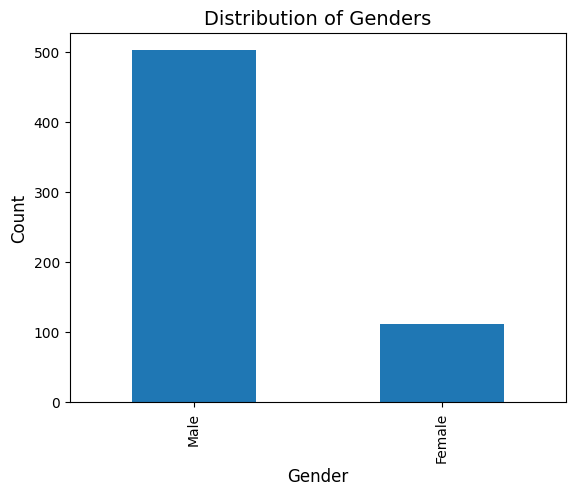

In [189]:
train['Gender'].value_counts().plot.bar()
plt.xlabel('Gender',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Genders',size=14)
plt.show()


**Distribution of Marital Status**

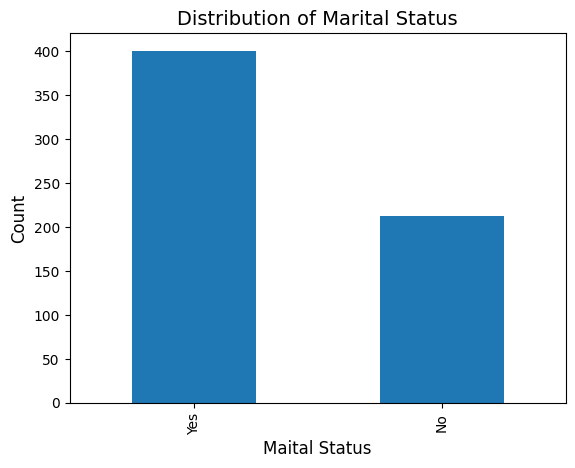

In [190]:
train['Married'].value_counts().plot.bar()
plt.xlabel('Maital Status',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Marital Status',size=14)
plt.show()

**Distribution of Dependents**

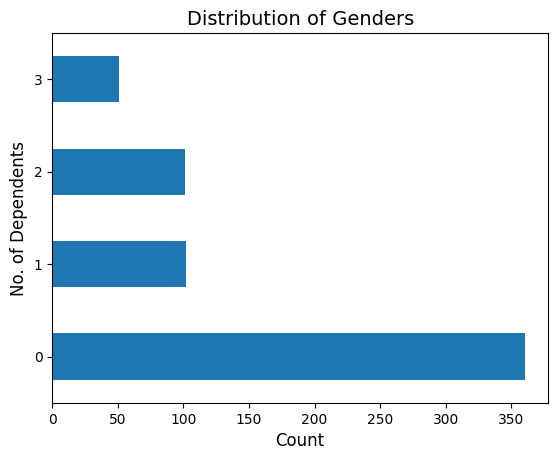

In [191]:
train['Dependents'].value_counts().plot.barh()
plt.xlabel('Count',size=12)
plt.ylabel('No. of Dependents',size=12)
plt.title('Distribution of Genders',size=14)
plt.show()

**Distribution of Education feature**

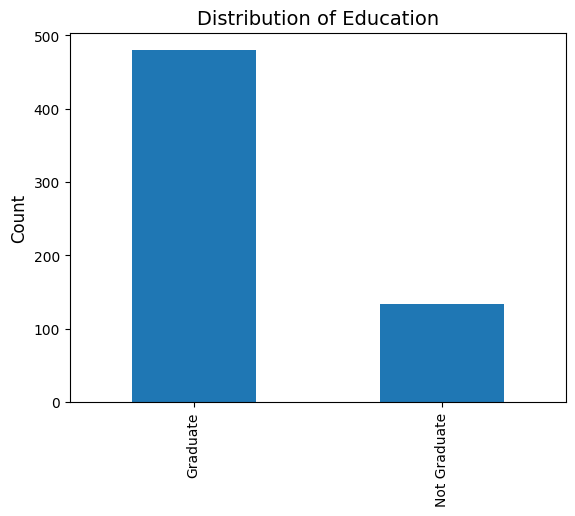

In [192]:
train['Education'].value_counts().plot.bar()
plt.ylabel('Count',size=12)
plt.title('Distribution of Education',size=14)
plt.show()

**Distribution of Self_employed**

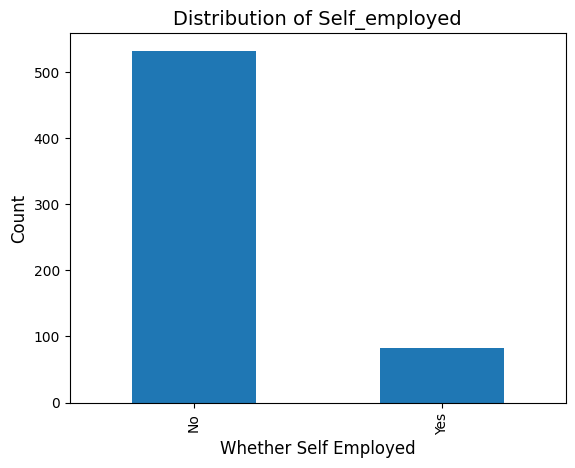

In [193]:
train['Self_Employed'].value_counts().plot.bar()
plt.xlabel('Whether Self Employed',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Self_employed',size=14)
plt.show()

**Distribution of Applicant Income**

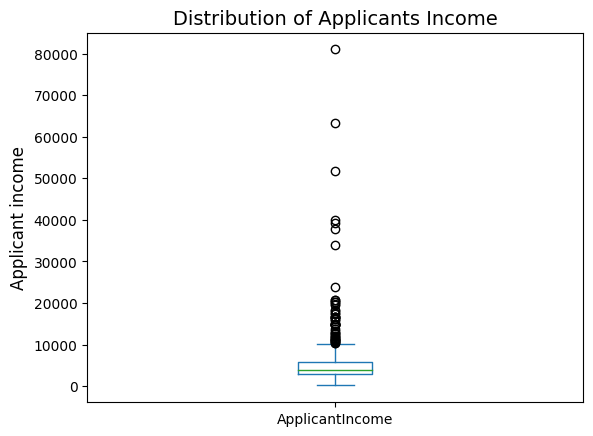

In [194]:
train.ApplicantIncome.plot.box()
plt.ylabel('Applicant income',size=12)
plt.title('Distribution of Applicants Income',size=14)
plt.show()

**Distribution of Co-applicant's Income**

<Axes: >

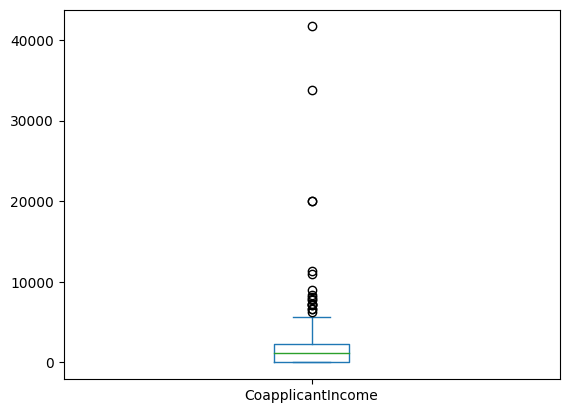

In [195]:
train['CoapplicantIncome'].plot.box()


**Distribution of Loan Amount**

<Axes: >

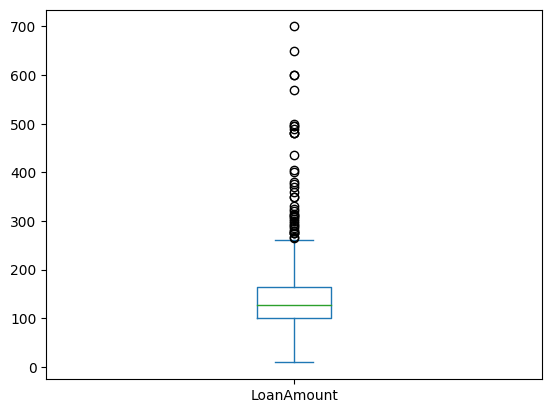

In [196]:
train['LoanAmount'].plot.box()

**Distribution of Loan_Amount_Term**

<Axes: >

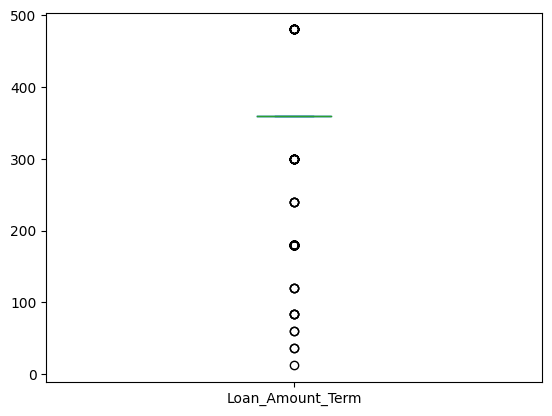

In [197]:
train['Loan_Amount_Term'].plot.box()

**Distribution of Credit History**

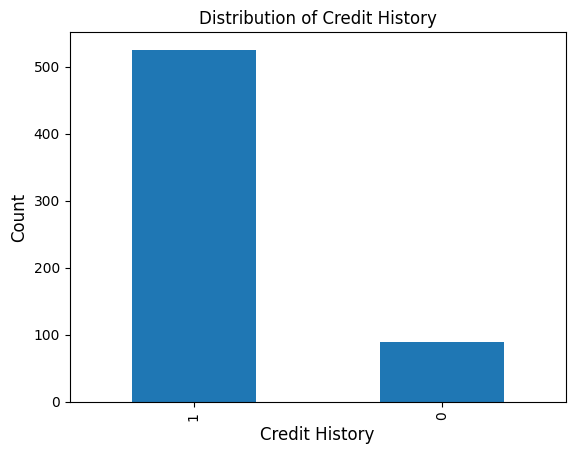

In [198]:
train['Credit_History'].value_counts().plot.bar()
plt.xlabel('Credit History',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Credit History')
plt.show()

**Distribution of Property Area**

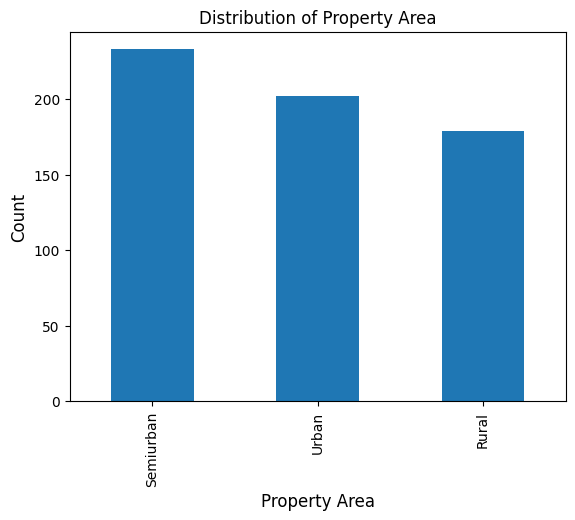

In [199]:
train['Property_Area'].value_counts().plot.bar()
plt.xlabel('Property Area',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Property Area')
plt.show()

**Distribution of Loan Status**

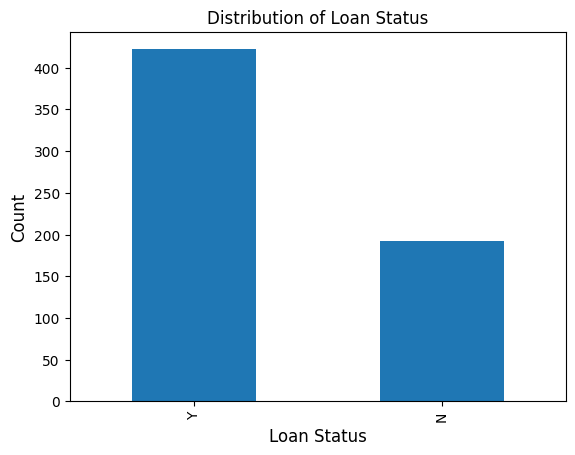

In [200]:
train['Loan_Status'].value_counts().plot.bar()
plt.xlabel('Loan Status',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of Loan Status')
plt.show()

**Bi-variate analysis**

In [201]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

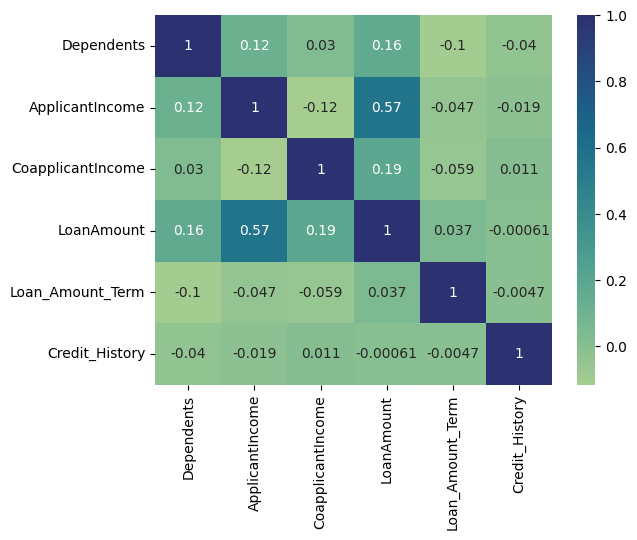

In [202]:
sns.heatmap(train.corr(),annot=True,cmap='crest')

In [182]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


**Applicant Income and Loan Status**

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

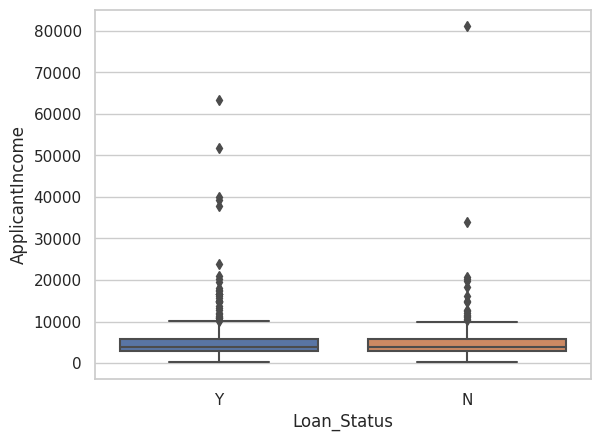

In [188]:
sns.boxplot(data=train,x='Loan_Status',y='ApplicantIncome')

**Loan Amount and Loan Status**

---



<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

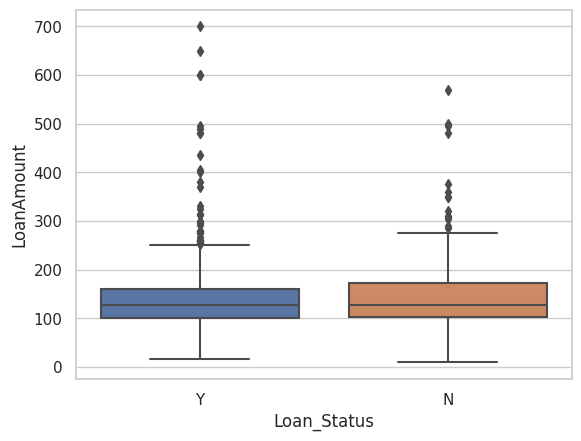

In [189]:
sns.boxplot(data=train,x='Loan_Status',y='LoanAmount')

In [203]:
#Lets define a function to check the chi2 contigency

In [204]:
from scipy.stats import chi2_contingency
def chi_sq_test(var1, var2):
  cont_table = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(cont_table, correction=False)
  print (cont_table)
  if p < 0.05:
    print('Accept the alternate Hypothesis/Reject the Null.  p value - ', round(p,2))
  else:
    print('Failed to reject the Null/Accept the Null  p value - ', round(p,2))


Relation between gender and loan status



1.   Ho,Null Hypothesis : gender and loan are independent
2.   H1,Alternate : gender and loan are dependent.



In [205]:
chi_sq_test(train['Gender'], train['Loan_Status'])

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347
Failed to reject the Null/Accept the Null  p value -  0.66


In [206]:
#Gender and Loan_status are Independent

Relation between Education and Loan Status

*   Null Hypothesis,Ho: Education and Loan Status are Independent.
*   Alternate Hypothesis,H1: Education and Loan Status are Dependent




In [207]:
chi_sq_test(train['Education'], train['Loan_Status'])

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Accept the alternate Hypothesis/Reject the Null.  p value -  0.03


In [208]:
#Education and Loan_status are dependent on each other

In [209]:
chi_sq_test(train['Credit_History'], train['Loan_Status'])

Loan_Status       N    Y
Credit_History          
0                82    7
1               110  415
Accept the alternate Hypothesis/Reject the Null.  p value -  0.0


In [210]:
#Credit_History has 100% dependency with Loan_status

In [211]:
chi_sq_test(train['Self_Employed'],train['Loan_Status'])

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56
Failed to reject the Null/Accept the Null  p value -  0.93


In [212]:
#Self_employed and Loan_status are Independent

In [213]:
chi_sq_test(train['Loan_Amount_Term'],train['Loan_Status'])

Loan_Status         N    Y
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             159  367
480.0               9    6
Failed to reject the Null/Accept the Null  p value -  0.13


In [214]:
chi_sq_test(train['Property_Area'],train['Loan_Status'])

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Accept the alternate Hypothesis/Reject the Null.  p value -  0.0


In [215]:
#Property Area and Loan Staus are higly dependent on each other

<a name = Section7></a>
# **7.Data Preparation**

In [81]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [6]:
#Lets make a new column Total_Income = ApplicantIncome + CoaplicantIncome

In [82]:
train['Total_Income'] = train.ApplicantIncome + train.CoapplicantIncome

In [83]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,6000.0


In [11]:
#Lets drop ApplicantIncome and Coaplicant Income

In [84]:
train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [85]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1,Urban,Y,6000.0


In [216]:
#Lets encode our categorical variables

Encoding the object

In [86]:
def enc(data):
  le = LabelEncoder()
  data['Gender'] = le.fit_transform(data['Gender'])
  data['Married'] = le.fit_transform(data['Married'])
  data['Education'] = le.fit_transform(data['Education'])
  data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
  data['Property_Area'] = le.fit_transform(data['Property_Area'])
  data['Loan_Status']=le.fit_transform(data['Loan_Status'])
  return data.head()

In [218]:
'''def enc_new(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtypes == 'O':
      data[i] = le.fit_transform(data[i])
      return data.head()
      '''

"def enc_new(data):\n  le = LabelEncoder()\n  for i in data.columns:\n    if data[i].dtypes == 'O':\n      data[i] = le.fit_transform(data[i])\n      return data.head()\n      "

In [87]:
enc(train).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,128.0,360.0,1,2,1,5849.0
1,LP001003,1,1,1,0,0,128.0,360.0,1,0,0,6091.0
2,LP001005,1,1,0,0,1,66.0,360.0,1,2,1,3000.0
3,LP001006,1,1,0,1,0,120.0,360.0,1,2,1,4941.0
4,LP001008,1,0,0,0,0,141.0,360.0,1,2,1,6000.0


In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,128.0,360.0,1,2,1,5849.0
1,LP001003,1,1,1,0,0,128.0,360.0,1,0,0,6091.0
2,LP001005,1,1,0,0,1,66.0,360.0,1,2,1,3000.0
3,LP001006,1,1,0,1,0,120.0,360.0,1,2,1,4941.0
4,LP001008,1,0,0,0,0,141.0,360.0,1,2,1,6000.0


In [14]:
#Standardize our Numerical features to get them on same scale

In [88]:
cont_features = ['LoanAmount','Loan_Amount_Term','Total_Income']

In [89]:
sc = StandardScaler()

In [90]:
train[cont_features] = sc.fit_transform(train[cont_features])

In [91]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,-0.211241,0.273231,1,2,1,-0.182184
1,LP001003,1,1,1,0,0,-0.211241,0.273231,1,0,0,-0.144684
2,LP001005,1,1,0,0,1,-0.948996,0.273231,1,2,1,-0.623656
3,LP001006,1,1,0,1,0,-0.306435,0.273231,1,2,1,-0.322885
4,LP001008,1,0,0,0,0,-0.056551,0.273231,1,2,1,-0.158785


# **8.Modelling**

In [221]:
#Lets Split our dataset into train and test

In [92]:
x = train.drop(['Loan_ID','Loan_Status'],axis=1)

In [93]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,-0.211241,0.273231,1,2,-0.182184
1,1,1,1,0,0,-0.211241,0.273231,1,0,-0.144684
2,1,1,0,0,1,-0.948996,0.273231,1,2,-0.623656
3,1,1,0,1,0,-0.306435,0.273231,1,2,-0.322885
4,1,0,0,0,0,-0.056551,0.273231,1,2,-0.158785


In [94]:
y = train['Loan_Status']

In [95]:
print(x.shape)

(614, 10)


In [24]:
print(y.shape)

(614,)


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15,stratify= y)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 10)
(154, 10)
(460,)
(154,)


**Logistic Regression**

In [98]:
lr=LogisticRegression()

In [99]:
lr.fit(x_train,y_train)

LogisticRegression()

In [100]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [231]:
#Lets define a function for Checking Model Accuracy,Classification Report and Confusion Matrix

In [101]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [102]:
model_eval(y_train,preds_lr_train)

Model Accuracy is:  0.81
[[ 62  82]
 [  6 310]]
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       144
           1       0.79      0.98      0.88       316

    accuracy                           0.81       460
   macro avg       0.85      0.71      0.73       460
weighted avg       0.83      0.81      0.78       460



In [103]:
model_eval(y_test, preds_lr_test)

Model Accuracy is:  0.81
[[ 21  27]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.91      0.44      0.59        48
           1       0.79      0.98      0.88       106

    accuracy                           0.81       154
   macro avg       0.85      0.71      0.73       154
weighted avg       0.83      0.81      0.79       154



**Decision Tree**

In [104]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [105]:
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [106]:
model_eval(y_train,preds_dtree_train)

Model Accuracy is:  0.83
[[ 75  69]
 [  8 308]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       144
           1       0.82      0.97      0.89       316

    accuracy                           0.83       460
   macro avg       0.86      0.75      0.77       460
weighted avg       0.84      0.83      0.82       460



In [107]:
model_eval(y_test,preds_dtree_test)

Model Accuracy is:  0.77
[[ 19  29]
 [  6 100]]
              precision    recall  f1-score   support

           0       0.76      0.40      0.52        48
           1       0.78      0.94      0.85       106

    accuracy                           0.77       154
   macro avg       0.77      0.67      0.69       154
weighted avg       0.77      0.77      0.75       154



In [239]:
#Our Model is Overfitting

In [240]:
#Lets look at the feature importances of columns

In [108]:
importances = list(zip(dtree.feature_importances_, x_train.columns))
importances.sort(reverse=True)
print(importances)


[(0.621268435009186, 'Credit_History'), (0.1558339865317222, 'LoanAmount'), (0.15364065881171554, 'Total_Income'), (0.06925691964737622, 'Married'), (0.0, 'Self_Employed'), (0.0, 'Property_Area'), (0.0, 'Loan_Amount_Term'), (0.0, 'Gender'), (0.0, 'Education'), (0.0, 'Dependents')]


**Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier(n_estimators=50,verbose=2)
rf.fit(x_train, y_train)


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


RandomForestClassifier(n_estimators=50, verbose=2)

In [110]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [111]:
model_eval(y_train, preds_rf_train)

Model Accuracy is:  1.0
[[144   0]
 [  0 316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       316

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



In [112]:
model_eval(y_test, preds_rf_test)

Model Accuracy is:  0.77
[[23 25]
 [11 95]]
              precision    recall  f1-score   support

           0       0.68      0.48      0.56        48
           1       0.79      0.90      0.84       106

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.76      0.77      0.75       154



In [118]:
#Lets see ada boost

In [119]:
from sklearn.ensemble import AdaBoostClassifier

In [120]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [121]:
model_eval(y_train,preds_ada_train)

Model Accuracy is:  0.85
[[ 83  61]
 [  9 307]]
              precision    recall  f1-score   support

           0       0.90      0.58      0.70       144
           1       0.83      0.97      0.90       316

    accuracy                           0.85       460
   macro avg       0.87      0.77      0.80       460
weighted avg       0.86      0.85      0.84       460



In [122]:
model_eval(y_test,preds_ada_test)

Model Accuracy is:  0.78
[[23 25]
 [ 9 97]]
              precision    recall  f1-score   support

           0       0.72      0.48      0.57        48
           1       0.80      0.92      0.85       106

    accuracy                           0.78       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.77      0.78      0.76       154



In [123]:
#XG Boost

In [124]:
import xgboost as xgb

In [125]:
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [126]:
model_eval(y_train,preds_xgb_train)

Model Accuracy is:  0.85
[[ 81  63]
 [  6 310]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       144
           1       0.83      0.98      0.90       316

    accuracy                           0.85       460
   macro avg       0.88      0.77      0.80       460
weighted avg       0.86      0.85      0.84       460



In [127]:
model_eval(y_test,preds_xgb_test)

Model Accuracy is:  0.78
[[21 27]
 [ 7 99]]
              precision    recall  f1-score   support

           0       0.75      0.44      0.55        48
           1       0.79      0.93      0.85       106

    accuracy                           0.78       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



In [263]:
#We can also try and do some hyperparameter tuning to select the best parameters

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
distributions = dict(n_estimators=[50, 100, 150, 200, 250], learning_rate=[0.01, 0.05, 0.1,0.25,0.2,0.3,0.5,1])

In [266]:
#Lets do for Ada Boost and XG Boost

In [130]:
ada_clf = RandomizedSearchCV(ada, distributions, random_state=15,verbose = 2)

In [131]:
ada_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.25, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.25, n_es

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.25,
                                                          0.2, 0.3, 0.5, 1],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=15, verbose=2)

In [132]:
print(ada_clf.best_params_)

{'n_estimators': 250, 'learning_rate': 0.1}


In [133]:
ada = AdaBoostClassifier(n_estimators=250,learning_rate=0.1)
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [134]:
model_eval(y_train,preds_ada_train)

Model Accuracy is:  0.83
[[ 75  69]
 [  7 309]]
              precision    recall  f1-score   support

           0       0.91      0.52      0.66       144
           1       0.82      0.98      0.89       316

    accuracy                           0.83       460
   macro avg       0.87      0.75      0.78       460
weighted avg       0.85      0.83      0.82       460



In [135]:
model_eval(y_test,preds_ada_test)

Model Accuracy is:  0.8
[[ 21  27]
 [  4 102]]
              precision    recall  f1-score   support

           0       0.84      0.44      0.58        48
           1       0.79      0.96      0.87       106

    accuracy                           0.80       154
   macro avg       0.82      0.70      0.72       154
weighted avg       0.81      0.80      0.78       154



In [273]:
#Heyerparamter tuning for XGBoost

In [143]:
param_dist_xgb = {
    'n_estimators': [50,100,150,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6]
}

In [144]:
xgb_clf = RandomizedSearchCV(xgclf,param_dist_xgb,verbose = 2)

In [145]:
xgb_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=4, n_e

RandomizedSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             ma...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             random_state=None, reg_alpha=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400]},
                   verbose=2)

In [146]:
print(xgb_clf.best_params_)

{'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.3}


In [147]:
xgclf1 = xgb.XGBRFClassifier(n_estimators=50,max_depth=6,learning_rate=0.3)
xgclf1.fit(x_train,y_train)
preds_xgb1_train = xgclf1.predict(x_train)
preds_xgb1_test = xgclf1.predict(x_test)

In [148]:
model_eval(y_train,preds_xgb1_train)

Model Accuracy is:  0.8
[[ 52  92]
 [  0 316]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53       144
           1       0.77      1.00      0.87       316

    accuracy                           0.80       460
   macro avg       0.89      0.68      0.70       460
weighted avg       0.85      0.80      0.77       460



In [149]:
model_eval(y_test,preds_xgb1_test)

Model Accuracy is:  0.79
[[ 16  32]
 [  1 105]]
              precision    recall  f1-score   support

           0       0.94      0.33      0.49        48
           1       0.77      0.99      0.86       106

    accuracy                           0.79       154
   macro avg       0.85      0.66      0.68       154
weighted avg       0.82      0.79      0.75       154



In [293]:
#Lets make an App and take input from user

In [285]:
#import pickle

In [286]:
#!pip install gradio

In [287]:
#import gradio as gr
#import pickle

In [288]:
#x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [289]:
'''
Gender = gr.Number(label = 'Enter 1 for Male and 0 for Female')
Married = gr.Number(label = 'Enter 1 for Married and 0 for Not Married')
Dependents = gr.Number(label = "Enter Dependents:")
Education = gr.Number(label = 'Enter 1 for Graduate and 0 for Not Graduate')
Self_Employed = gr.Number(label = 'Enter 1 for Self Employed and 0 for Not Self Employed')
ApplicantIncome = gr.Number(label= "Enter Applicant Income Income")
CoapplicantIncome = gr.Number(label = "Enter Coapplicant Income")
LoanAmount = gr.Number(label= "Enter the loan amount")
Loan_Amount_Term = gr.Number(label = 'Enter between 12 - 360')
Credit_History = gr.Number(label = "Enter the Credit_History")
Property_Area = gr.Number(label = "Enter 1 for Urban, 0 Rural and 2 Semi Urban")
 We create the output
output = gr.Textbox()

'''

In [290]:
'''
with open("filename.pkl", "wb") as f:
  pickle.dump(lr, f)
  '''

In [291]:
'''
def make_prediction(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
    with open("filename.pkl", "rb") as f:
        clf  = pickle.load(f)
        preds = clf.predict([[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]])
    if preds == 1:
            return "You are eligible for the loan"
    return "You are not eligible for the loan"
    '''

In [292]:
#app = gr.Interface(fn = make_prediction, inputs=[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area], outputs=output)
#app.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2614f29b60f2ff73c7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://2614f29b60f2ff73c7.gradio.live


# **9.Test Dataset**

In [190]:
test = pd.read_csv('/content/test_lAUu6dG (2).csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [191]:
def data_prep(data):
  data['Gender'] = np.where(data['Gender'].isna(), 'Male', data['Gender'])
  data['Married'] = np.where(data['Married'].isna(), 'Yes', data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(), '0', data['Dependents'])
  data['Dependents'].replace('3+','3', inplace=True)
  data['Dependents'] = data['Dependents'].astype('int')
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(), 'No', data['Self_Employed'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(), data['Loan_Amount_Term'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(), data['LoanAmount'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].median(), data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype('int')
  return data.head()


In [192]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban


In [56]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [345]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


In [193]:
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [194]:
test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [156]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,1,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1,Urban,3276


In [195]:
le = LabelEncoder()

In [196]:
test['Gender'] = le.fit_transform(test['Gender'])
test['Married'] = le.fit_transform(test['Married'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test['Property_Area'] = le.fit_transform(test['Property_Area'])

In [197]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,1,1,0,0,0,110.0,360.0,1,2,5720
1,LP001022,1,1,1,0,0,126.0,360.0,1,2,4576
2,LP001031,1,1,2,0,0,208.0,360.0,1,2,6800
3,LP001035,1,1,2,0,0,100.0,360.0,1,2,4886
4,LP001051,1,0,0,1,0,78.0,360.0,1,2,3276


In [198]:
cont_features = ['LoanAmount','Loan_Amount_Term','Total_Income']

In [199]:
test[cont_features] = sc.fit_transform(test[cont_features])

In [200]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,1,1,0,0,0,-0.426780,0.266022,1,2,-0.126182
1,LP001022,1,1,1,0,0,-0.163953,0.266022,1,2,-0.346506
2,LP001031,1,1,2,0,0,1.183033,0.266022,1,2,0.081817
3,LP001035,1,1,2,0,0,-0.591047,0.266022,1,2,-0.286803
4,LP001051,1,0,0,1,0,-0.952433,0.266022,1,2,-0.596875


In [201]:
loan_id = test['Loan_ID']

In [202]:
test_drop = test.drop('Loan_ID',axis=1)

In [203]:
predictions_xgb = xgclf1.predict(test_drop)

In [166]:
predictions_lr = lr.predict(test_drop)

In [204]:
predictions_ada = ada.predict(test_drop)

In [167]:
submission_data_xgb = {
    'Loan_ID': loan_id,
    'Loan_Status': predictions_xgb
}

submission_df_xgb_1 = pd.DataFrame(submission_data_xgb)

In [168]:
submission_df_xgb_1.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [169]:
submission_df_xgb_1['Loan_Status'] = submission_df_xgb_1['Loan_Status'].replace({1:'Y',0:'N'})

In [170]:
submission_df_xgb_1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [171]:
submission_data_lr = {
    'Loan_ID': loan_id,
    'Loan_Status': predictions_lr
}

submission_df_lr_2 = pd.DataFrame(submission_data_lr)

In [172]:
submission_df_lr_2['Loan_Status'] = submission_df_lr_2['Loan_Status'].replace({1:'Y',0:'N'})

In [173]:
submission_df_lr_2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [174]:
submission_df_xgb_1.to_csv('Loan Prediction_xgb.csv',index=False)

In [175]:
submission_df_lr_2.to_csv('Loan_Prediction_lr.csv',index=False)

In [368]:
sample_submission = pd.read_csv('/content/sample_submission_49d68Cx (1).csv')

In [369]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [205]:
submission_data_ada = {
    'Loan_ID': loan_id,
    'Loan_Status': predictions_xgb
}

submission_df_ada = pd.DataFrame(submission_data_ada)

In [206]:
submission_df_ada['Loan_Status'] = submission_df_ada['Loan_Status'].replace({1:'Y',0:'N'})

In [207]:
submission_df_ada.to_csv('Loan_Prediction_ada.csv',index=False)